# Loan data analysis of the Irish dummy bank

## By: Mohammed Modather Taha

## Preview:
### 1- The Irish dummy bank is a peer to peer lending bank based in Ireland .This dataset provides detailed information for the loans lent by the bank in which it provides funds for potential borrowers and earn a profit depending on their obligation.
### 2- The information provided in dataset show the bank's loan data from  year 2007 to 2015

## Features:
### 1- annual_inc: The self-reported annual income provided by the borrower during registration.
### 2- home_ownership: The home ownership status provided by the borrower during registration. Our values are: RENT, OWN, MORTGAGE, OTHER
### 3- interest_rate: interest rate is the amount a lender charges a borrower and is a percentage of the amount loaned.
### 4- term: The number of payments on the loan. Values are in months and can be either 36 or 60
### 5- loan_amount:The amount of fund provided for the borrower in loan application



### 6- purpose: The reason supplied by the borrower in the application for why he needs the money
### 7- emp_length_time: Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years.
### 8- region: The state provided by the borrower in the loan application
### 9- installment: The monthly payment owed by the borrower if the loan originates.
### 10- application_type: Indicates whether the loan is an individual application or a joint application with two co-borrowers
### 11- dti: A ratio calculated using the borrower’s total monthly debt payments on the total debt obligations, - - - excluding mortgage and the requested LC loan, divided by the borrower’s self-reported monthly income.

## Source of dataset: Kaggle


## Goal: Prediction of loan status of applications whether the borrower will pay back full loan amount plus interest or the loan will be charged off.

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sn
import datetime
import matplotlib as plt   #loading libraries used in the project

In [3]:
df=pd.read_csv('project folder/loan_final313.csv',na_values=['?','-',"....",'NaN','no']) #loading the dataset 

In [4]:
df

,id,year,issue_d,final_d,emp_length_int,home_ownership,home_ownership_cat,income_category,annual_inc,income_cat,...,loan_condition_cat,interest_rate,grade,grade_cat,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,1,Low,24000,1,...,0,10.65,B,2,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,1,Low,30000,1,...,1,15.27,C,3,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,1,Low,12252,1,...,0,15.96,C,3,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,1,Low,49200,1,...,0,13.49,C,3,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,1,Low,80000,1,...,0,12.69,B,2,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,1,Low,31000,1,...,0,11.99,B,2,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,3,Low,79000,1,...,0,11.99,B,2,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,1,Low,35000,1,...,0,15.99,D,4,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,1,Low,64400,1,...,0,19.99,E,5,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    887379 non-null  int64  
 1   year                  887379 non-null  int64  
 2   issue_d               887379 non-null  object 
 3   final_d               887379 non-null  int64  
 4   emp_length_int        887379 non-null  float64
 5   home_ownership        887379 non-null  object 
 6   home_ownership_cat    887379 non-null  int64  
 7   income_category       887379 non-null  object 
 8   annual_inc            887379 non-null  int64  
 9   income_cat            887379 non-null  int64  
 10  loan_amount           887379 non-null  int64  
 11  term                  887379 non-null  object 
 12  term_cat              887379 non-null  int64  
 13  application_type      887379 non-null  object 
 14  application_type_cat  887379 non-null  int64  
 15  

In [5]:
df.isnull().sum()

id                      0
year                    0
issue_d                 0
final_d                 0
emp_length_int          0
home_ownership          0
home_ownership_cat      0
income_category         0
annual_inc              0
income_cat              0
loan_amount             0
term                    0
term_cat                0
application_type        0
application_type_cat    0
purpose                 0
purpose_cat             0
interest_payments       0
interest_payment_cat    0
loan_condition          0
loan_condition_cat      0
interest_rate           0
grade                   0
grade_cat               0
dti                     0
total_pymnt             0
total_rec_prncp         0
recoveries              0
installment             0
region                  0
dtype: int64

In [6]:
df['loan_amount'].nunique() # check the number of unique values for the feature

1372

In [7]:
df['purpose'].unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [8]:
df['purpose_cat'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14],
      dtype=int64)

In [9]:
df['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [10]:
df['interest_payments'].unique()

array(['Low', 'High'], dtype=object)

In [11]:
df['loan_condition'].unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

In [12]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [6]:
df[df['interest_rate']==df['interest_rate'].max()] #slicing dataframe by condition

,id,year,issue_d,final_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,...,interest_payments,loan_condition,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
469092,68394899,2015,01/12/2015,1012016,10.0,RENT,Low,83400,30225,60 months,...,High,Good Loan,28.99,G,21.56,0.00,0.00,0.0,959.22,Northern-Irl
469119,68384913,2015,01/12/2015,1012016,3.0,RENT,Low,50000,18225,60 months,...,High,Good Loan,28.99,G,20.91,0.00,0.00,0.0,578.39,leinster
471996,68072840,2015,01/12/2015,1012016,3.0,MORTGAGE,Low,75000,32725,60 months,...,High,Good Loan,28.99,G,19.85,0.00,0.00,0.0,1038.56,Northern-Irl
474148,67909604,2015,01/12/2015,1012016,6.0,MORTGAGE,Low,54427,13050,60 months,...,High,Good Loan,28.99,G,20.57,0.00,0.00,0.0,414.16,cannught
475700,67305736,2015,01/12/2015,1012016,10.0,RENT,Medium,150000,11100,60 months,...,High,Good Loan,28.99,G,3.02,0.00,0.00,0.0,352.27,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
727846,51265184,2015,01/06/2015,1012016,3.0,RENT,Low,50000,10700,60 months,...,High,Good Loan,28.99,G,10.49,2359.83,610.43,0.0,339.58,Northern-Irl
733490,50506085,2015,01/06/2015,1012016,1.0,RENT,Low,50000,17000,60 months,...,High,Good Loan,28.99,G,19.25,3749.19,969.78,0.0,539.51,leinster
736510,49924023,2015,01/05/2015,1122015,10.0,RENT,Low,35000,11700,60 months,...,High,Bad Loan,28.99,G,20.13,2190.17,565.13,0.0,371.31,cannught
739677,49865167,2015,01/05/2015,1122015,10.0,RENT,Low,80000,29900,60 months,...,High,Good Loan,28.99,G,20.04,6521.91,1705.64,0.0,948.90,ulster


In [5]:
for i in df.columns:
    x=i.split('_')
    if 'cat' in x[1:]:
        df.drop(i,axis=1,inplace=True)
        
## removing useless features which contains "cat" word

        


In [15]:
df

,id,year,issue_d,final_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,...,interest_payments,loan_condition,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
0,1077501,2011,01/12/2011,1012015,10.0,RENT,Low,24000,5000,36 months,...,Low,Good Loan,10.65,B,27.65,5861.071414,5000.00,0.00,162.87,munster
1,1077430,2011,01/12/2011,1042013,0.5,RENT,Low,30000,2500,60 months,...,High,Bad Loan,15.27,C,1.00,1008.710000,456.46,117.08,59.83,leinster
2,1077175,2011,01/12/2011,1062014,10.0,RENT,Low,12252,2400,36 months,...,High,Good Loan,15.96,C,8.72,3003.653644,2400.00,0.00,84.33,cannught
3,1076863,2011,01/12/2011,1012015,10.0,RENT,Low,49200,10000,36 months,...,High,Good Loan,13.49,C,20.00,12226.302210,10000.00,0.00,339.31,ulster
4,1075358,2011,01/12/2011,1012016,1.0,RENT,Low,80000,3000,60 months,...,Low,Good Loan,12.69,B,17.94,3242.170000,2233.10,0.00,67.79,ulster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
887374,36371250,2015,01/01/2015,1012016,8.0,RENT,Low,31000,10000,36 months,...,Low,Good Loan,11.99,B,28.69,3971.880000,2944.53,0.00,332.10,ulster
887375,36441262,2015,01/01/2015,1012016,10.0,MORTGAGE,Low,79000,24000,36 months,...,Low,Good Loan,11.99,B,3.90,9532.390000,7066.74,0.00,797.03,Northern-Irl
887376,36271333,2015,01/01/2015,1012016,5.0,RENT,Low,35000,13000,60 months,...,High,Good Loan,15.99,D,30.90,3769.740000,1844.50,0.00,316.07,leinster
887377,36490806,2015,01/01/2015,1012016,1.0,RENT,Low,64400,12000,60 months,...,High,Good Loan,19.99,E,27.19,3787.670000,1552.69,0.00,317.86,Northern-Irl


In [16]:
df.columns

Index(['id', 'year', 'issue_d', 'final_d', 'emp_length_int', 'home_ownership',
       'income_category', 'annual_inc', 'loan_amount', 'term',
       'application_type', 'purpose', 'interest_payments', 'loan_condition',
       'interest_rate', 'grade', 'dti', 'total_pymnt', 'total_rec_prncp',
       'recoveries', 'installment', 'region'],
      dtype='object')

In [17]:
df['grade'].unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [104]:
df.drop('grade',axis=1,inplace=True) #removing useless feature

In [105]:
df2=df.sample(frac=0.12,random_state=66) #taking a sample from data as it's too large
df2

,id,year,issue_d,final_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,...,purpose,interest_payments,loan_condition,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
841192,41049280,2015,01/02/2015,1122015,0.5,MORTGAGE,Medium,125000,35000,36 months,...,debt_consolidation,Low,Good Loan,9.99,23.11,11298.79,8699.08,0.0,1129.19,cannught
815494,43064840,2015,01/03/2015,1012016,10.0,MORTGAGE,Low,82000,10000,36 months,...,credit_card,Low,Good Loan,6.92,20.42,3076.41,2573.51,0.0,308.41,cannught
408611,14638217,2014,01/04/2014,1122015,10.0,MORTGAGE,Low,64800,8000,36 months,...,debt_consolidation,High,Good Loan,17.57,25.33,9809.21,8000.00,0.0,287.50,leinster
878214,38616350,2015,01/01/2015,1012016,10.0,MORTGAGE,High,300000,35000,60 months,...,debt_consolidation,High,Good Loan,15.59,22.27,10092.05,5014.12,0.0,843.53,Northern-Irl
421621,13185944,2014,01/03/2014,1122015,4.0,MORTGAGE,Low,68000,12000,36 months,...,credit_card,Low,Good Loan,11.99,7.17,8368.92,6474.35,0.0,398.52,leinster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235488,36581244,2014,01/12/2014,1012016,0.5,RENT,Low,35000,14675,60 months,...,credit_card,High,Good Loan,18.54,15.47,4784.88,2265.36,0.0,376.98,leinster
343962,21020966,2014,01/07/2014,1012016,4.0,RENT,Low,33000,3000,36 months,...,debt_consolidation,Low,Good Loan,10.99,15.71,1767.78,1377.36,0.0,98.21,leinster
291948,29343959,2014,01/10/2014,1012016,10.0,MORTGAGE,Low,60000,20000,60 months,...,debt_consolidation,High,Good Loan,17.57,25.94,7548.15,3500.53,0.0,503.21,ulster
626594,58993315,2015,01/09/2015,1012016,10.0,MORTGAGE,Low,52000,21825,36 months,...,debt_consolidation,High,Good Loan,15.61,22.67,3033.51,1954.54,0.0,763.11,ulster


In [22]:
df2['year'].value_counts()

2015    50861
2014    28226
2013    15944
2012     6345
2011     2662
2010     1418
2009      669
2008      275
2007       85
Name: year, dtype: int64

In [9]:
df2.rename(columns={'term':'term_month'},inplace=True) #renaming the feature
df2

,id,year,issue_d,final_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term_month,...,interest_payments,loan_condition,interest_rate,grade,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
841192,41049280,2015,01/02/2015,1122015,0.5,MORTGAGE,Medium,125000,35000,36 months,...,Low,Good Loan,9.99,B,23.11,11298.79,8699.08,0.0,1129.19,cannught
815494,43064840,2015,01/03/2015,1012016,10.0,MORTGAGE,Low,82000,10000,36 months,...,Low,Good Loan,6.92,A,20.42,3076.41,2573.51,0.0,308.41,cannught
408611,14638217,2014,01/04/2014,1122015,10.0,MORTGAGE,Low,64800,8000,36 months,...,High,Good Loan,17.57,D,25.33,9809.21,8000.00,0.0,287.50,leinster
878214,38616350,2015,01/01/2015,1012016,10.0,MORTGAGE,High,300000,35000,60 months,...,High,Good Loan,15.59,D,22.27,10092.05,5014.12,0.0,843.53,Northern-Irl
421621,13185944,2014,01/03/2014,1122015,4.0,MORTGAGE,Low,68000,12000,36 months,...,Low,Good Loan,11.99,B,7.17,8368.92,6474.35,0.0,398.52,leinster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235488,36581244,2014,01/12/2014,1012016,0.5,RENT,Low,35000,14675,60 months,...,High,Good Loan,18.54,E,15.47,4784.88,2265.36,0.0,376.98,leinster
343962,21020966,2014,01/07/2014,1012016,4.0,RENT,Low,33000,3000,36 months,...,Low,Good Loan,10.99,B,15.71,1767.78,1377.36,0.0,98.21,leinster
291948,29343959,2014,01/10/2014,1012016,10.0,MORTGAGE,Low,60000,20000,60 months,...,High,Good Loan,17.57,D,25.94,7548.15,3500.53,0.0,503.21,ulster
626594,58993315,2015,01/09/2015,1012016,10.0,MORTGAGE,Low,52000,21825,36 months,...,High,Good Loan,15.61,D,22.67,3033.51,1954.54,0.0,763.11,ulster


In [10]:
df2['term_month']=df2['term_month'].apply(lambda x:x.split(" ")[1]) #removing 'month' word from the feature to convert it to numeric feature

In [99]:
df2

,id,year,issue_d,emp_length_int,home_ownership,annual_inc,loan_amount,term_month,application_type,purpose,interest_rate,grade,dti,installment,region,net_income,interest+loan_amn,loan_stat
39635,153054,2007,01/11/2007,7.0,MORTGAGE,66000,5875,36,INDIVIDUAL,credit_card,10.91,C,19.82,192.09,leinster,814.28,6915.24,Fully paid
39652,142734,2007,01/11/2007,10.0,MORTGAGE,57000,25000,36,INDIVIDUAL,small_business,9.01,B,8.93,795.11,ulster,2752.16,28623.96,Fully paid
42383,134737,2007,01/10/2007,0.5,RENT,28020,5000,36,INDIVIDUAL,wedding,8.70,B,1.80,158.31,leinster,0.00,5699.16,Charged off
39691,132946,2007,01/10/2007,9.0,MORTGAGE,85000,5275,36,INDIVIDUAL,other,7.43,A,2.64,163.92,leinster,625.28,5901.12,Fully paid
42286,155369,2007,01/11/2007,2.0,OWN,12000,6000,36,INDIVIDUAL,educational,12.80,D,3.00,201.59,Northern-Irl,1257.02,7257.24,Fully paid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851310,40580372,2015,01/01/2015,10.0,RENT,20000,7500,36,INDIVIDUAL,debt_consolidation,12.99,C,33.89,252.67,cannught,0.00,9096.12,Charged off
521969,65494884,2015,01/11/2015,2.0,RENT,70000,8000,36,INDIVIDUAL,debt_consolidation,11.49,B,10.58,263.78,ulster,0.00,9496.08,Charged off
596577,60912704,2015,01/09/2015,2.0,MORTGAGE,51000,19525,36,INDIVIDUAL,debt_consolidation,17.57,D,14.92,701.68,cannught,0.00,25260.48,Charged off
861373,39650330,2015,01/01/2015,1.0,RENT,47500,23700,60,INDIVIDUAL,debt_consolidation,17.14,D,37.82,590.80,Northern-Irl,0.00,35448.00,Charged off


In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106485 entries, 841192 to 680208
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 106485 non-null  int64  
 1   year               106485 non-null  int64  
 2   issue_d            106485 non-null  object 
 3   final_d            106485 non-null  int64  
 4   emp_length_int     106485 non-null  float64
 5   home_ownership     106485 non-null  object 
 6   income_category    106485 non-null  object 
 7   annual_inc         106485 non-null  int64  
 8   loan_amount        106485 non-null  int64  
 9   term_month         106485 non-null  object 
 10  application_type   106485 non-null  object 
 11  purpose            106485 non-null  object 
 12  interest_payments  106485 non-null  object 
 13  loan_condition     106485 non-null  object 
 14  interest_rate      106485 non-null  float64
 15  dti                106485 non-null  float64
 1

### Fixing datatypes

In [27]:
df2['issue_d']=pd.to_datetime(df2['issue_d'])

In [12]:
df2['term_month']=pd.to_numeric(df2['term_month'],errors='coerce') #converting it to numeric feature 

## Extracting useful features from data and removing useless ones

In [13]:
df2.drop('final_d',axis=1,inplace=True) # removing useless features

In [14]:
df2.drop('loan_condition',axis=1,inplace=True) 

In [33]:
df2

,id,year,issue_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term_month,application_type,purpose,interest_payments,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
841192,41049280,2015,2015-01-02,0.5,MORTGAGE,Medium,125000,35000,36,INDIVIDUAL,debt_consolidation,Low,9.99,23.11,11298.79,8699.08,0.0,1129.19,cannught
815494,43064840,2015,2015-01-03,10.0,MORTGAGE,Low,82000,10000,36,INDIVIDUAL,credit_card,Low,6.92,20.42,3076.41,2573.51,0.0,308.41,cannught
408611,14638217,2014,2014-01-04,10.0,MORTGAGE,Low,64800,8000,36,INDIVIDUAL,debt_consolidation,High,17.57,25.33,9809.21,8000.00,0.0,287.50,leinster
878214,38616350,2015,2015-01-01,10.0,MORTGAGE,High,300000,35000,60,INDIVIDUAL,debt_consolidation,High,15.59,22.27,10092.05,5014.12,0.0,843.53,Northern-Irl
421621,13185944,2014,2014-01-03,4.0,MORTGAGE,Low,68000,12000,36,INDIVIDUAL,credit_card,Low,11.99,7.17,8368.92,6474.35,0.0,398.52,leinster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235488,36581244,2014,2014-01-12,0.5,RENT,Low,35000,14675,60,INDIVIDUAL,credit_card,High,18.54,15.47,4784.88,2265.36,0.0,376.98,leinster
343962,21020966,2014,2014-01-07,4.0,RENT,Low,33000,3000,36,INDIVIDUAL,debt_consolidation,Low,10.99,15.71,1767.78,1377.36,0.0,98.21,leinster
291948,29343959,2014,2014-01-10,10.0,MORTGAGE,Low,60000,20000,60,INDIVIDUAL,debt_consolidation,High,17.57,25.94,7548.15,3500.53,0.0,503.21,ulster
626594,58993315,2015,2015-01-09,10.0,MORTGAGE,Low,52000,21825,36,INDIVIDUAL,debt_consolidation,High,15.61,22.67,3033.51,1954.54,0.0,763.11,ulster


In [15]:
df2=df2.sort_values('year',ascending=True) #sort data according to years

In [35]:
df2

,id,year,issue_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term_month,application_type,purpose,interest_payments,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
39635,153054,2007,2007-01-11,7.0,MORTGAGE,Low,66000,5875,36,INDIVIDUAL,credit_card,Low,10.91,19.82,6689.28,5875.00,0.00,192.09,leinster
39652,142734,2007,2007-01-11,10.0,MORTGAGE,Low,57000,25000,36,INDIVIDUAL,small_business,Low,9.01,8.93,27752.16,25000.00,0.00,795.11,ulster
42383,134737,2007,2007-01-10,0.5,RENT,Low,28020,5000,36,INDIVIDUAL,wedding,Low,8.70,1.80,530.49,244.80,214.13,158.31,leinster
39691,132946,2007,2007-01-10,9.0,MORTGAGE,Low,85000,5275,36,INDIVIDUAL,other,Low,7.43,2.64,5900.28,5275.00,0.00,163.92,leinster
42286,155369,2007,2007-01-11,2.0,OWN,Low,12000,6000,36,INDIVIDUAL,educational,Low,12.80,3.00,7257.02,6000.00,0.00,201.59,Northern-Irl
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623407,59290888,2015,2015-01-09,10.0,RENT,Medium,185000,25000,36,INDIVIDUAL,credit_card,High,17.57,6.26,3532.71,2176.78,0.00,898.43,leinster
521969,65494884,2015,2015-01-11,2.0,RENT,Low,70000,8000,36,INDIVIDUAL,debt_consolidation,Low,11.49,10.58,253.57,187.18,0.00,263.78,ulster
596577,60912704,2015,2015-01-09,2.0,MORTGAGE,Low,51000,19525,36,INDIVIDUAL,debt_consolidation,High,17.57,14.92,2190.80,1265.76,0.00,701.68,cannught
861373,39650330,2015,2015-01-01,1.0,RENT,Low,47500,23700,60,INDIVIDUAL,debt_consolidation,High,17.14,37.82,5272.06,2404.71,0.00,590.80,Northern-Irl


In [16]:
df2['net_income']=np.where(df2['total_rec_prncp']==df2['loan_amount'],(df2['total_pymnt'] + df2['recoveries'])-df2['loan_amount'],0)

### Based on domain knowledge, extracting feature like net income will help evaluating the outcome of the loans in comparison with other features throughout years but it won't considered as an independant variable in the machine learning model as it's an outcome of the past results


In [37]:
df2

,id,year,issue_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term_month,application_type,purpose,interest_payments,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region,net_income
39635,153054,2007,2007-01-11,7.0,MORTGAGE,Low,66000,5875,36,INDIVIDUAL,credit_card,Low,10.91,19.82,6689.28,5875.00,0.00,192.09,leinster,814.28
39652,142734,2007,2007-01-11,10.0,MORTGAGE,Low,57000,25000,36,INDIVIDUAL,small_business,Low,9.01,8.93,27752.16,25000.00,0.00,795.11,ulster,2752.16
42383,134737,2007,2007-01-10,0.5,RENT,Low,28020,5000,36,INDIVIDUAL,wedding,Low,8.70,1.80,530.49,244.80,214.13,158.31,leinster,0.00
39691,132946,2007,2007-01-10,9.0,MORTGAGE,Low,85000,5275,36,INDIVIDUAL,other,Low,7.43,2.64,5900.28,5275.00,0.00,163.92,leinster,625.28
42286,155369,2007,2007-01-11,2.0,OWN,Low,12000,6000,36,INDIVIDUAL,educational,Low,12.80,3.00,7257.02,6000.00,0.00,201.59,Northern-Irl,1257.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
623407,59290888,2015,2015-01-09,10.0,RENT,Medium,185000,25000,36,INDIVIDUAL,credit_card,High,17.57,6.26,3532.71,2176.78,0.00,898.43,leinster,0.00
521969,65494884,2015,2015-01-11,2.0,RENT,Low,70000,8000,36,INDIVIDUAL,debt_consolidation,Low,11.49,10.58,253.57,187.18,0.00,263.78,ulster,0.00
596577,60912704,2015,2015-01-09,2.0,MORTGAGE,Low,51000,19525,36,INDIVIDUAL,debt_consolidation,High,17.57,14.92,2190.80,1265.76,0.00,701.68,cannught,0.00
861373,39650330,2015,2015-01-01,1.0,RENT,Low,47500,23700,60,INDIVIDUAL,debt_consolidation,High,17.14,37.82,5272.06,2404.71,0.00,590.80,Northern-Irl,0.00


In [17]:
df2['interest+loan_amn']=df2['installment']*df2['term_month'] #another feature extracted from the data

In [18]:
df2['loan_stat']=np.where(df2['loan_amount']==df2['total_rec_prncp'],'Fully paid','Charged off') 
# the independant variable (the goal of project)

In [174]:
df2

,id,year,issue_d,final_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,...,purpose,interest_payments,loan_condition,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
841192,41049280,2015,01/02/2015,1122015,0.5,MORTGAGE,Medium,125000,35000,36 months,...,debt_consolidation,Low,Good Loan,9.99,23.11,11298.79,8699.08,0.0,1129.19,cannught
815494,43064840,2015,01/03/2015,1012016,10.0,MORTGAGE,Low,82000,10000,36 months,...,credit_card,Low,Good Loan,6.92,20.42,3076.41,2573.51,0.0,308.41,cannught
408611,14638217,2014,01/04/2014,1122015,10.0,MORTGAGE,Low,64800,8000,36 months,...,debt_consolidation,High,Good Loan,17.57,25.33,9809.21,8000.00,0.0,287.50,leinster
878214,38616350,2015,01/01/2015,1012016,10.0,MORTGAGE,High,300000,35000,60 months,...,debt_consolidation,High,Good Loan,15.59,22.27,10092.05,5014.12,0.0,843.53,Northern-Irl
421621,13185944,2014,01/03/2014,1122015,4.0,MORTGAGE,Low,68000,12000,36 months,...,credit_card,Low,Good Loan,11.99,7.17,8368.92,6474.35,0.0,398.52,leinster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235488,36581244,2014,01/12/2014,1012016,0.5,RENT,Low,35000,14675,60 months,...,credit_card,High,Good Loan,18.54,15.47,4784.88,2265.36,0.0,376.98,leinster
343962,21020966,2014,01/07/2014,1012016,4.0,RENT,Low,33000,3000,36 months,...,debt_consolidation,Low,Good Loan,10.99,15.71,1767.78,1377.36,0.0,98.21,leinster
291948,29343959,2014,01/10/2014,1012016,10.0,MORTGAGE,Low,60000,20000,60 months,...,debt_consolidation,High,Good Loan,17.57,25.94,7548.15,3500.53,0.0,503.21,ulster
626594,58993315,2015,01/09/2015,1012016,10.0,MORTGAGE,Low,52000,21825,36 months,...,debt_consolidation,High,Good Loan,15.61,22.67,3033.51,1954.54,0.0,763.11,ulster


In [19]:
df2.drop('recoveries',axis=1,inplace=True)  # removing useless features

In [20]:
df2.drop('total_pymnt',axis=1,inplace=True)

In [21]:
df2.drop('total_rec_prncp',axis=1,inplace=True)

In [22]:
df2.drop('interest_payments',axis=1,inplace=True)

In [23]:
df2.drop('income_category',axis=1,inplace=True)

In [24]:
df2.columns

Index(['id', 'year', 'issue_d', 'emp_length_int', 'home_ownership',
       'annual_inc', 'loan_amount', 'term_month', 'application_type',
       'purpose', 'interest_rate', 'grade', 'dti', 'installment', 'region',
       'net_income', 'interest+loan_amn', 'loan_stat'],
      dtype='object')

In [47]:
df2.isnull().sum() #check if there is missing data

id                   0
year                 0
issue_d              0
emp_length_int       0
home_ownership       0
annual_inc           0
loan_amount          0
term_month           0
application_type     0
purpose              0
interest_rate        0
dti                  0
installment          0
region               0
net_income           0
interest+loan_amn    0
loan_stat            0
dtype: int64

### No missing data, the data is clean 

## Outliers


In [40]:
from datasist.structdata import detect_outliers
out=detect_outliers(df2,0,['loan_amount']) # check for outliers
out

[]

In [55]:

out=detect_outliers(df2,0,['annual_inc'])
out

[]

In [54]:
df2.drop(out,inplace=True) # removing outliers as it won't affect the data

<AxesSubplot:xlabel='annual_inc'>

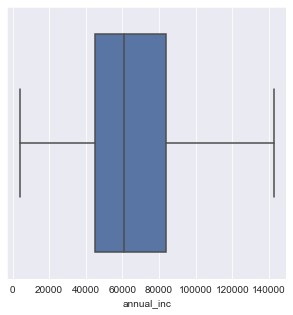

In [56]:
sn.boxplot(data=df2,x='annual_inc')

In [43]:

out=detect_outliers(df2,0,['dti'])
out

[]

In [42]:
df2.drop(out,inplace=True)

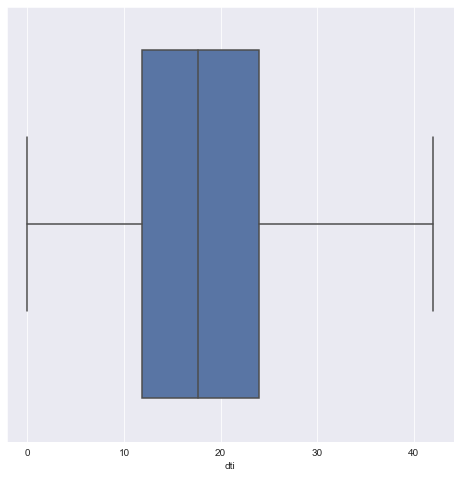

In [44]:
sn.boxplot(data=df2,x='dti')
sn.set({'figure.figsize':[5,5]},font_scale=1.6)

In [55]:
df2['dti']=pd.to_numeric(df2['dti'],errors='coerce')

<AxesSubplot:xlabel='net_income'>

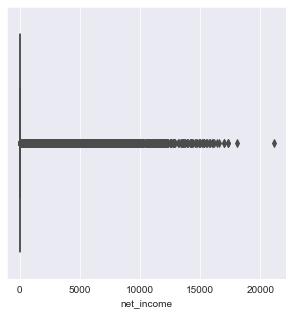

In [269]:
sn.boxplot(data=df2,x='net_income') # the outliers is kept as this feature isn't an independant varible in the predictive model

In [57]:
ot=detect_outliers(df2,0,['net_income']) #the outliers of this feature aren't removed as it is just used in data analysis andwon't be an independant variable in ML model
ot

[39635,
 39652,
 39691,
 42286,
 42495,
 39773,
 39554,
 39593,
 39632,
 42159,
 42328,
 39566,
 42201,
 42341,
 39700,
 42291,
 42434,
 39610,
 42234,
 42484,
 39731,
 39582,
 42416,
 39538,
 42322,
 39726,
 39755,
 39744,
 42427,
 39763,
 42517,
 39748,
 42410,
 42243,
 42433,
 39649,
 42283,
 39594,
 42481,
 39657,
 39764,
 42214,
 42508,
 42519,
 42429,
 42393,
 39718,
 42385,
 42456,
 42377,
 39579,
 42450,
 42390,
 39734,
 42310,
 39728,
 42339,
 39642,
 42218,
 42303,
 39640,
 38754,
 39240,
 38416,
 38769,
 38214,
 41596,
 39482,
 37977,
 39442,
 39208,
 38675,
 41977,
 39030,
 42058,
 41580,
 41937,
 41761,
 42131,
 38963,
 39524,
 41493,
 38192,
 41706,
 38991,
 38687,
 42099,
 39446,
 38027,
 39429,
 41775,
 42148,
 41818,
 38190,
 39359,
 38899,
 38361,
 38198,
 38860,
 38994,
 41423,
 41563,
 38975,
 38881,
 38126,
 39530,
 41594,
 39061,
 38011,
 38136,
 42141,
 42047,
 38159,
 38883,
 38296,
 39248,
 41785,
 39045,
 38334,
 41359,
 38174,
 41454,
 38002,
 39511,
 39055,


# Exploratory data analysis

In [107]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106485 entries, 841192 to 680208
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 106485 non-null  int64  
 1   year               106485 non-null  int64  
 2   issue_d            106485 non-null  object 
 3   final_d            106485 non-null  int64  
 4   emp_length_int     106485 non-null  float64
 5   home_ownership     106485 non-null  object 
 6   income_category    106485 non-null  object 
 7   annual_inc         106485 non-null  int64  
 8   loan_amount        106485 non-null  int64  
 9   term               106485 non-null  object 
 10  application_type   106485 non-null  object 
 11  purpose            106485 non-null  object 
 12  interest_payments  106485 non-null  object 
 13  loan_condition     106485 non-null  object 
 14  interest_rate      106485 non-null  float64
 15  dti                106485 non-null  float64
 1

In [59]:
df2.describe()

,id,year,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,dti,installment,net_income,interest+loan_amn
count,1.016900e+05,101690.000000,101690.000000,101690.000000,101690.000000,101690.000000,101690.000000,101690.000000,101690.000000,101690.000000,101690.000000
mean,3.246982e+07,2014.020110,6.056598,67605.437624,14342.071738,43.179467,13.271921,18.396648,424.280101,412.027238,18736.626267
std,2.283575e+07,1.265919,3.500273,29907.381303,8179.244528,10.989252,4.363554,8.295418,234.972959,1190.729204,11784.674349
min,5.552100e+04,2007.000000,0.500000,4000.000000,500.000000,36.000000,5.320000,0.000000,16.250000,0.000000,585.000000
25%,9.206610e+06,2013.000000,3.000000,45000.000000,8000.000000,36.000000,9.990000,12.180000,255.300000,0.000000,9642.240000
50%,3.445367e+07,2014.000000,6.050000,62000.000000,12375.000000,36.000000,12.990000,17.980000,374.150000,0.000000,16435.440000
75%,5.506960e+07,2015.000000,10.000000,85000.000000,20000.000000,60.000000,16.240000,24.220000,553.160000,0.000000,25174.800000
max,6.861687e+07,2015.000000,10.000000,156620.000000,35000.000000,60.000000,28.990000,42.030000,1408.130000,21087.909920,66007.800000


In [106]:
df2

,id,year,issue_d,final_d,emp_length_int,home_ownership,income_category,annual_inc,loan_amount,term,...,purpose,interest_payments,loan_condition,interest_rate,dti,total_pymnt,total_rec_prncp,recoveries,installment,region
841192,41049280,2015,01/02/2015,1122015,0.5,MORTGAGE,Medium,125000,35000,36 months,...,debt_consolidation,Low,Good Loan,9.99,23.11,11298.79,8699.08,0.0,1129.19,cannught
815494,43064840,2015,01/03/2015,1012016,10.0,MORTGAGE,Low,82000,10000,36 months,...,credit_card,Low,Good Loan,6.92,20.42,3076.41,2573.51,0.0,308.41,cannught
408611,14638217,2014,01/04/2014,1122015,10.0,MORTGAGE,Low,64800,8000,36 months,...,debt_consolidation,High,Good Loan,17.57,25.33,9809.21,8000.00,0.0,287.50,leinster
878214,38616350,2015,01/01/2015,1012016,10.0,MORTGAGE,High,300000,35000,60 months,...,debt_consolidation,High,Good Loan,15.59,22.27,10092.05,5014.12,0.0,843.53,Northern-Irl
421621,13185944,2014,01/03/2014,1122015,4.0,MORTGAGE,Low,68000,12000,36 months,...,credit_card,Low,Good Loan,11.99,7.17,8368.92,6474.35,0.0,398.52,leinster
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235488,36581244,2014,01/12/2014,1012016,0.5,RENT,Low,35000,14675,60 months,...,credit_card,High,Good Loan,18.54,15.47,4784.88,2265.36,0.0,376.98,leinster
343962,21020966,2014,01/07/2014,1012016,4.0,RENT,Low,33000,3000,36 months,...,debt_consolidation,Low,Good Loan,10.99,15.71,1767.78,1377.36,0.0,98.21,leinster
291948,29343959,2014,01/10/2014,1012016,10.0,MORTGAGE,Low,60000,20000,60 months,...,debt_consolidation,High,Good Loan,17.57,25.94,7548.15,3500.53,0.0,503.21,ulster
626594,58993315,2015,01/09/2015,1012016,10.0,MORTGAGE,Low,52000,21825,36 months,...,debt_consolidation,High,Good Loan,15.61,22.67,3033.51,1954.54,0.0,763.11,ulster


In [61]:
df2['region'].unique()

array(['leinster', 'ulster', 'Northern-Irl', 'cannught', 'munster'],
      dtype=object)

In [62]:
df2[['annual_inc','net_income']].corr() #correlation

,annual_inc,net_income
annual_inc,1.000000,0.084308
net_income,0.084308,1.000000


In [63]:
df2[['dti','net_income']].corr()

,dti,net_income
dti,1.000000,-0.061264
net_income,-0.061264,1.000000


In [64]:
df2[['emp_length_int','net_income']].corr()

,emp_length_int,net_income
emp_length_int,1.000000,0.009917
net_income,0.009917,1.000000


In [65]:
df2[['net_income','loan_amount']].corr()

,net_income,loan_amount
net_income,1.000000,0.155447
loan_amount,0.155447,1.000000


In [66]:
df2[df2['net_income']==df2['net_income'].max()]['dti'] #dti with max net income

200041    15.25
Name: dti, dtype: float64

In [67]:
df2[df2['net_income']==df2['net_income'].max()]['region'] #region with max net income

200041    Northern-Irl
Name: region, dtype: object

In [68]:
df2['net_income'].max()

21087.909920000006

In [69]:
df2['net_income'].min()

0.0

In [70]:
df2[df2['year']==2014]['loan_stat'].value_counts()

Charged off    20812
Fully paid      6149
Name: loan_stat, dtype: int64

In [71]:
df2[df2['region']=='leinster']['loan_stat'].value_counts()

Charged off    19254
Fully paid      5278
Name: loan_stat, dtype: int64

In [72]:
df2[df2['region']=='cannught']['loan_stat'].value_counts()

Charged off    14437
Fully paid      3637
Name: loan_stat, dtype: int64

In [73]:
df2[df2['region']=='ulster']['loan_stat'].value_counts()

Charged off    17585
Fully paid      6186
Name: loan_stat, dtype: int64

In [74]:
df2[df2['region']=='Northern-Irl']['loan_stat'].value_counts()

Charged off    17955
Fully paid      5179
Name: loan_stat, dtype: int64

In [75]:
df2[df2['region']=='munster']['loan_stat'].value_counts()

Charged off    9423
Fully paid     2756
Name: loan_stat, dtype: int64

In [76]:
df2[(df2['purpose']=='vacation')]['loan_stat'].value_counts()

Charged off    417
Fully paid     134
Name: loan_stat, dtype: int64

In [77]:
df2[(df2['purpose']=='medical')]['loan_stat'].value_counts()

Charged off    728
Fully paid     236
Name: loan_stat, dtype: int64

In [78]:
df2['purpose'].unique()

array(['credit_card', 'small_business', 'wedding', 'other', 'educational',
       'debt_consolidation', 'house', 'car', 'home_improvement', 'moving',
       'medical', 'major_purchase', 'vacation', 'renewable_energy'],
      dtype=object)

In [79]:
df2[(df2['purpose']=='small_business')]['loan_stat'].value_counts()

Charged off    756
Fully paid     337
Name: loan_stat, dtype: int64

In [224]:
df2[(df2['purpose']=='small_business')& (df2['year']==2012)]['loan_stat'].value_counts()

Fully paid     122
Charged off     56
Name: loan_stat, dtype: int64

In [79]:
df2[(df2['purpose']=='small_business')& (df2['year']==2013)]['loan_stat'].value_counts()

Charged off    78
Fully paid     36
Name: loan_stat, dtype: int64

In [78]:
df2[(df2['purpose']=='educational')]['loan_stat'].value_counts()

Fully paid     47
Charged off     3
Name: loan_stat, dtype: int64

In [80]:
df2[(df2['purpose']=='educational')& (df2['dti']>10)]['loan_stat'].value_counts()

Fully paid     29
Charged off     3
Name: loan_stat, dtype: int64

In [81]:
df2[df2['year']==2015]['purpose'].value_counts()

debt_consolidation    28835
credit_card           11745
home_improvement       2752
other                  2185
major_purchase          796
medical                 461
car                     416
small_business          373
vacation                272
moving                  268
house                   147
renewable_energy         34
Name: purpose, dtype: int64

In [82]:
df2[(df2['application_type']=='JOINT')]['loan_stat'].value_counts()


Charged off    44
Name: loan_stat, dtype: int64

In [83]:
df2['application_type'].unique()

array(['INDIVIDUAL', 'JOINT'], dtype=object)

In [84]:
df2[(df2['home_ownership']=='MORTGAGE')]['loan_stat'].value_counts()

Charged off    38416
Fully paid     11552
Name: loan_stat, dtype: int64

In [226]:
df2[(df2['home_ownership']=='MORTGAGE')& (df2['year']==2012)]['loan_stat'].value_counts()

Fully paid     2265
Charged off     722
Name: loan_stat, dtype: int64

In [227]:
df2[(df2['home_ownership']=='MORTGAGE')& (df2['year']==2013)]['loan_stat'].value_counts()

Charged off    4964
Fully paid     3541
Name: loan_stat, dtype: int64

In [85]:
df2[(df2['home_ownership']=='RENT')]['loan_stat'].value_counts()

Charged off    32050
Fully paid      9518
Name: loan_stat, dtype: int64

In [228]:
df2[(df2['home_ownership']=='RENT')& (df2['year']==2012)]['loan_stat'].value_counts()

Fully paid     2214
Charged off     665
Name: loan_stat, dtype: int64

In [229]:
df2[(df2['home_ownership']=='RENT')& (df2['year']==2013)]['loan_stat'].value_counts()

Charged off    3650
Fully paid     2442
Name: loan_stat, dtype: int64

In [86]:
df2[(df2['home_ownership']=='OWN')]['loan_stat'].value_counts()

Charged off    8179
Fully paid     1944
Name: loan_stat, dtype: int64

In [230]:
df2[(df2['home_ownership']=='OWN') & (df2['year']==2012)]['loan_stat'].value_counts()

Fully paid     348
Charged off    116
Name: loan_stat, dtype: int64

In [87]:
int(df2['net_income'].sum())

41899049

In [88]:
df2['net_income'].median()

0.0

In [89]:
int(df2['net_income'].mean())

412

In [90]:
int(df2[(df2['loan_stat']=='Fully paid') & (df2['year']==2015)]['net_income'].sum())

1733330

In [76]:
df2[(df2['year']==2013) & (df2['region']=='ulster')& (df2['home_ownership']=='MORTGAGE')]['loan_stat'].value_counts()

Charged off    829
Fully paid     812
Name: loan_stat, dtype: int64

In [77]:
df2[(df2['year']==2013) & (df2['region']=='ulster')& (df2['home_ownership']=='RENT')]['loan_stat'].value_counts()

Charged off    1154
Fully paid      823
Name: loan_stat, dtype: int64

In [92]:
df2[(df2['loan_stat']=='Charged off') & (df2['year']== 2015)]['net_income'].count()

45694

In [93]:
df2['year'].value_counts()

2015    48284
2014    26961
2013    15368
2012     6151
2011     2560
2010     1372
2009      645
2008      267
2007       82
Name: year, dtype: int64

In [105]:
df2.groupby('region').sum()['net_income'] #total income with each region

region
Northern-Irl    9.393426e+06
cannught        6.481915e+06
leinster        9.526892e+06
munster         5.213305e+06
ulster          1.128351e+07
Name: net_income, dtype: float64

In [94]:
df2.groupby('year').sum()['net_income'] # bank income throughout years

year
2007    6.947085e+04
2008    1.898403e+05
2009    6.252420e+05
2010    1.650586e+06
2011    3.461319e+06
2012    1.097242e+07
2013    1.378949e+07
2014    9.407356e+06
2015    1.733330e+06
Name: net_income, dtype: float64

In [110]:
df2[(df2['year']==2012) &(df2['loan_stat']=='Fully paid')]['home_ownership'].value_counts()

RENT        2187
MORTGAGE    2140
OWN          342
OTHER          9
NONE           3
Name: home_ownership, dtype: int64

In [95]:
 int(df2[df2['year']==2012]['net_income'].sum()) #total income in 2012

10972421

In [109]:
df2[(df2['year']==2012) &(df2['loan_stat']=='Fully paid')]['purpose'].value_counts()

debt_consolidation    2704
credit_card            958
other                  252
home_improvement       232
major_purchase         127
small_business         114
car                     80
wedding                 57
medical                 50
house                   36
moving                  34
vacation                32
renewable_energy         5
Name: purpose, dtype: int64

In [96]:
df2[(df2['year']==2012)]['loan_stat'].value_counts()

Fully paid     4681
Charged off    1470
Name: loan_stat, dtype: int64

In [111]:
df2[df2['year']==2012]['region'].value_counts()

ulster          1610
Northern-Irl    1481
leinster        1406
cannught         912
munster          742
Name: region, dtype: int64

In [97]:
int(df2[df2['purpose']=='debt_consolidation']['net_income'].sum())

26364113

In [98]:
df2[df2['purpose']=='debt_consolidation']['loan_stat'].value_counts()

Charged off    46943
Fully paid     13439
Name: loan_stat, dtype: int64

In [29]:
df2[df2['purpose']=='medical']['loan_stat'].value_counts()

Charged off    757
Fully paid     248
Name: loan_stat, dtype: int64

In [100]:
df2[df2['purpose']=='medical']['net_income'].sum()

276771.410653

## Data visualization

### 1- These are plots that show the value counts of loan status feature and explain its correlation with other features like year, region, purpose, home ownership and interest rate.

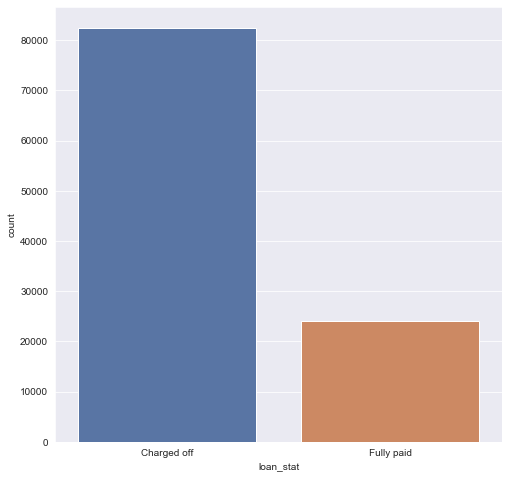

In [190]:
sn.countplot(data=df2,x='loan_stat')
sn.set({'figure.figsize':[8,8]},font_scale=1.5)

<AxesSubplot:xlabel='year', ylabel='count'>

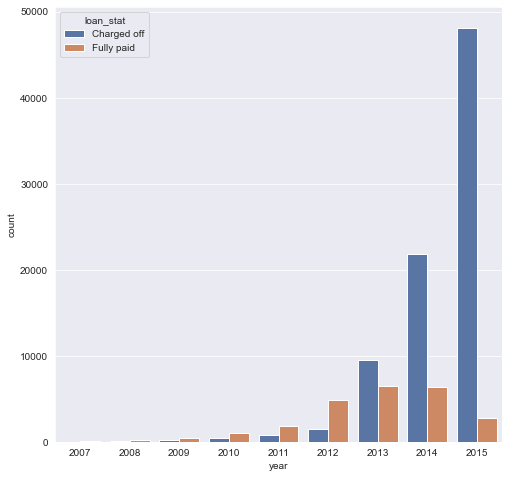

In [191]:
sn.countplot(data=df2,x='year',hue='loan_stat')

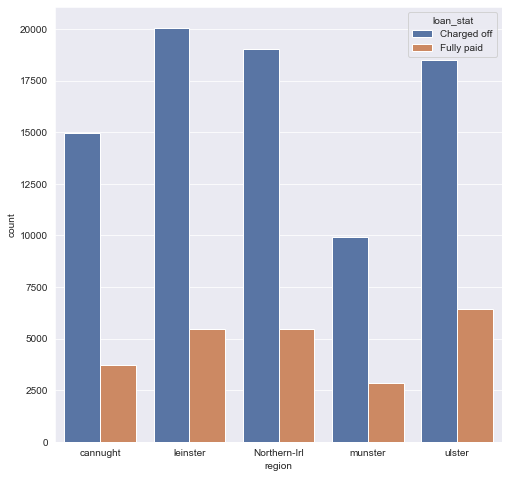

In [202]:
sn.countplot(data=df2,x='region',hue='loan_stat')
sn.set({'figure.figsize':[8,8]},font_scale=1.3)

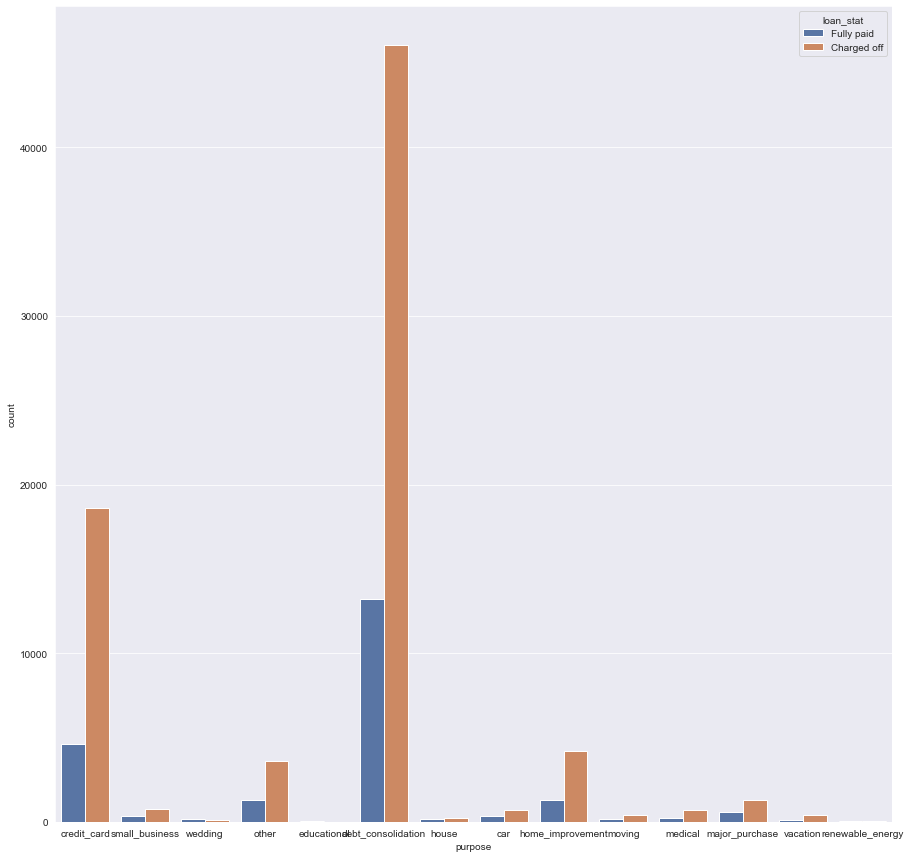

In [62]:
sn.countplot(data=df2,x='purpose',hue='loan_stat')
sn.set({'figure.figsize':[15,15]},font_scale=1.2)

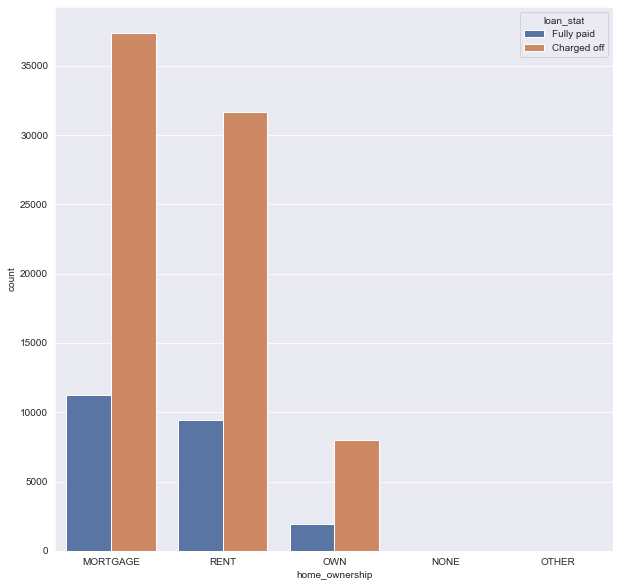

In [65]:
sn.countplot(data=df2,x='home_ownership',hue='loan_stat')
sn.set({'figure.figsize':[8,8]},font_scale=1.3)

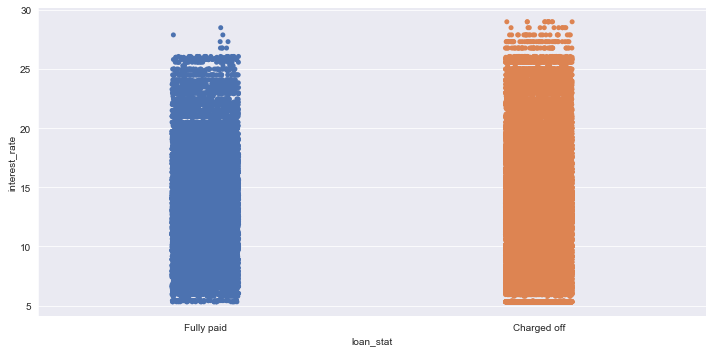

In [32]:
sn.catplot(data=df2,x='loan_stat',y='interest_rate',aspect=2)


### 2-  A plot which shows the correlation between net income and home ownership features over years

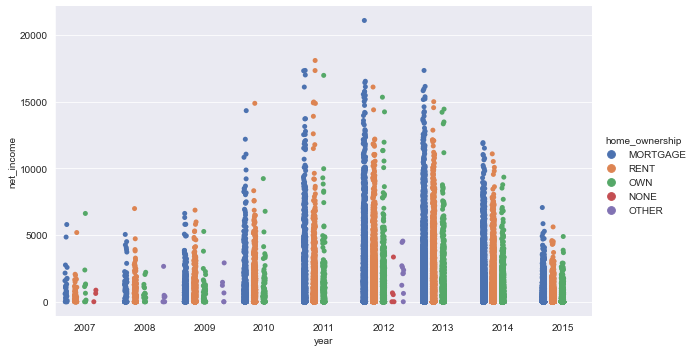

In [33]:
sn.catplot(data=df2,y='net_income',x='year',kind='strip',hue='home_ownership',dodge=True,aspect=1.7)

<AxesSubplot:xlabel='term_month', ylabel='count'>

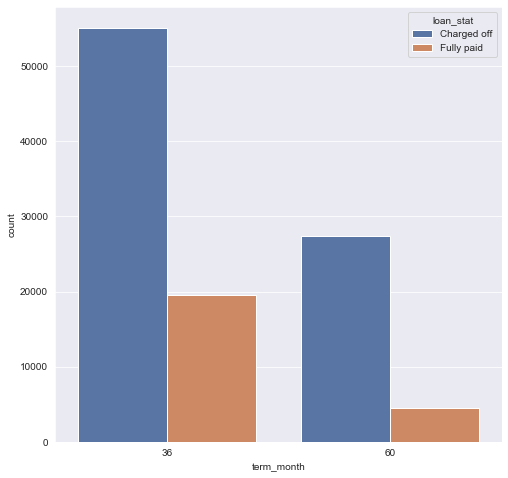

In [203]:
sn.countplot(data=df2,x='term_month',hue='loan_stat')

### 3- A plot which shows correlation between annual income and home ownership features and its effect on the value counts of loan status

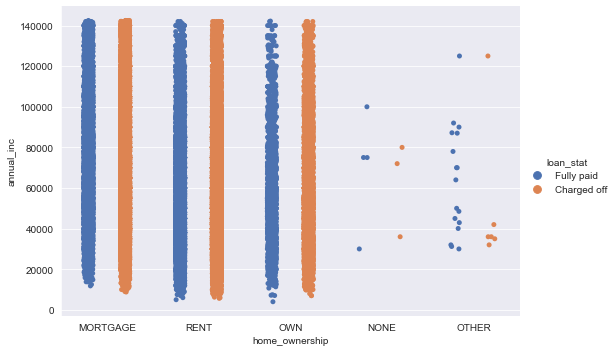

In [57]:
sn.catplot(data=df2,x='home_ownership',y='annual_inc',hue='loan_stat',dodge=True,aspect=1.5)

### 4- A plot which shows the correlation between home ownership and loan amount features and their effect on the value counts of loan status

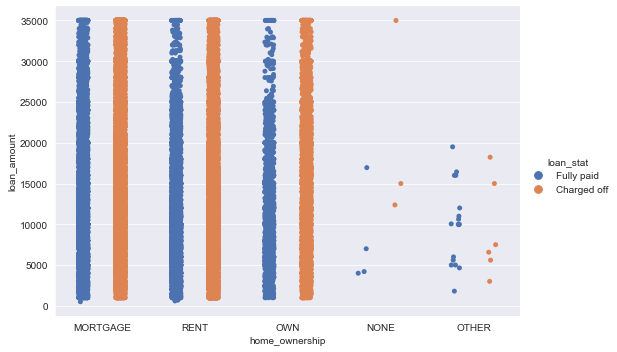

In [58]:
sn.catplot(data=df2,x='home_ownership',y='loan_amount',hue='loan_stat',dodge=True,aspect=1.5)


D:\anaconda\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
D:\anaconda\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
D:\anaconda\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
D:\anaconda\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  hue_mask = self.plot_hues[i] == hue_level
D:\anaconda\lib\site-packages\seaborn\categorical.py:1143: FutureWarning: elementwis

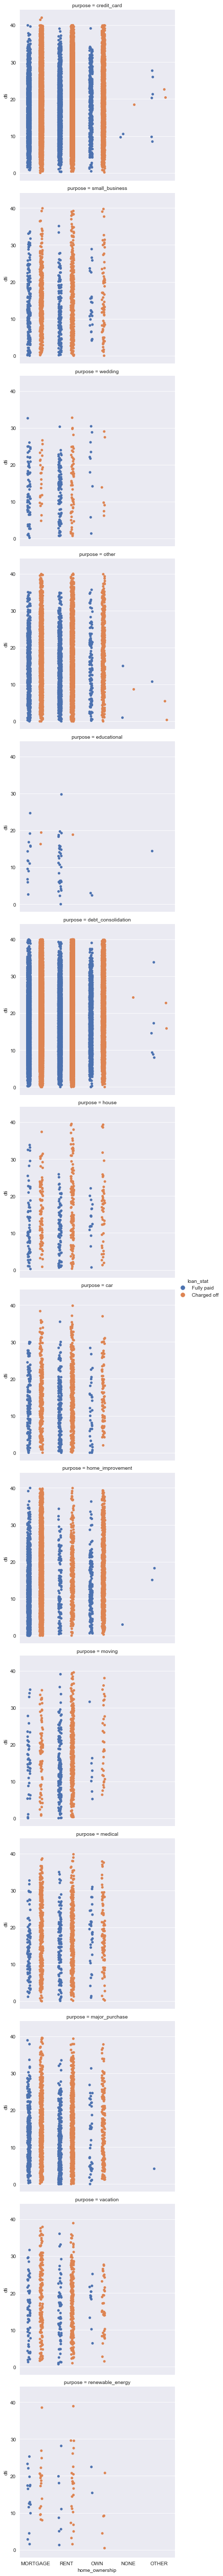

In [45]:
sn.catplot(data=df2,y='dti',x='home_ownership',hue='loan_stat',row='purpose',dodge=True)

### 5- A plot which shows the correlation between region and loan amount features and their effect on the value counts of loan status

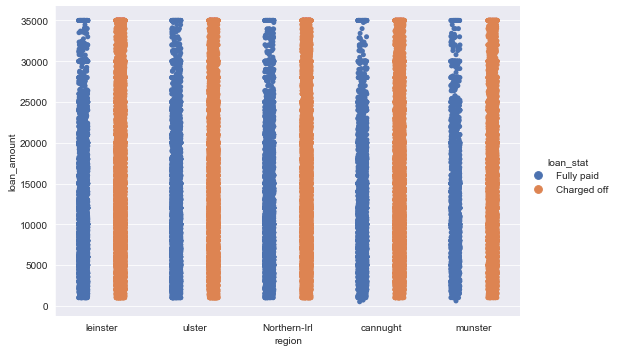

In [59]:
sn.catplot(data=df2,x='region',y='loan_amount',hue='loan_stat',dodge=True,aspect=1.5)

In [28]:
df2.corr()

,id,year,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,dti,installment,net_income,interest+loan_amn
id,1.000000,0.820170,0.009771,0.039482,0.065619,0.066389,-0.141161,0.041167,0.027886,-0.364129,0.048792
year,0.820170,1.000000,0.045455,0.040557,0.107833,0.080054,-0.061354,0.045457,0.079998,-0.368982,0.099257
emp_length_int,0.009771,0.045455,1.000000,0.057618,0.101553,0.061064,0.009789,0.010852,0.088531,0.009337,0.101564
annual_inc,0.039482,0.040557,0.057618,1.000000,0.298596,0.048735,-0.076524,-0.047706,0.292760,0.043467,0.263243
loan_amount,0.065619,0.107833,0.101553,0.298596,1.000000,0.408493,0.140521,0.015030,0.944964,0.153579,0.969785
term_month,0.066389,0.080054,0.061064,0.048735,0.408493,1.000000,0.425134,0.027609,0.141286,0.033151,0.548871
interest_rate,-0.141161,-0.061354,0.009789,-0.076524,0.140521,0.425134,1.000000,0.046411,0.128999,0.145422,0.317204
dti,0.041167,0.045457,0.010852,-0.047706,0.015030,0.027609,0.046411,1.000000,0.012428,-0.017285,0.022632
installment,0.027886,0.079998,0.088531,0.292760,0.944964,0.141286,0.128999,0.012428,1.000000,0.181248,0.883633
net_income,-0.364129,-0.368982,0.009337,0.043467,0.153579,0.033151,0.145422,-0.017285,0.181248,1.000000,0.167971


### 6- A plot which shows the correlation coefficient between the numerical features

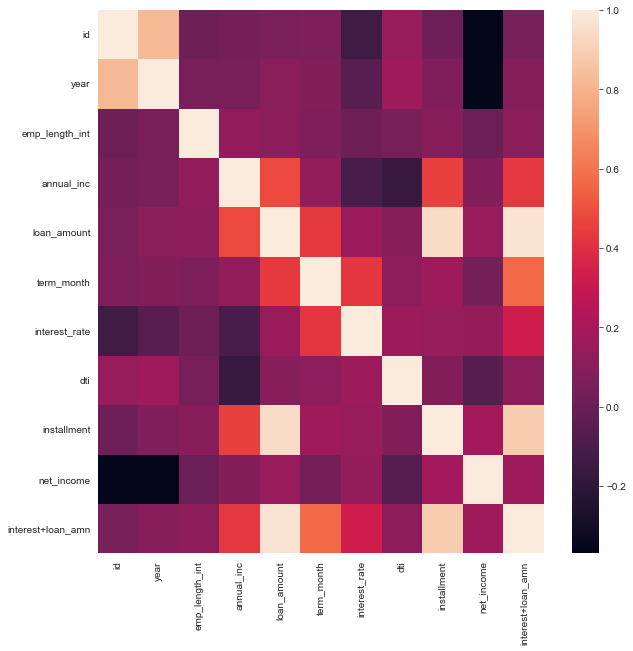

In [72]:
sn.heatmap(df2.corr())
sn.set({'figure.figsize':[10,10]},font_scale=1.5)

## Recommendations:
### 1- Decrease the total number of loans lent annually as in 2012 and 2013 so that the bank can assess the loan applications wisely
### 2- Support the loan applicants with wedding and educational purposes with lower interest rate to gain more clients
### 3- The bank should accept individual applications only


# Data Preprocessing

## Converting categorical data to numerical

In [81]:
df3=pd.get_dummies(df2,columns=['application_type','home_ownership','purpose','region'],drop_first=True)

In [82]:
df3

,id,year,issue_d,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,grade,dti,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_cannught,region_leinster,region_munster,region_ulster
39635,153054,2007,01/11/2007,7.0,66000,5875,36,10.91,C,19.82,...,0,0,0,0,0,0,0,1,0,0
39652,142734,2007,01/11/2007,10.0,57000,25000,36,9.01,B,8.93,...,0,0,0,1,0,0,0,0,0,1
42383,134737,2007,01/10/2007,0.5,28020,5000,36,8.70,B,1.80,...,0,0,0,0,0,1,0,1,0,0
39691,132946,2007,01/10/2007,9.0,85000,5275,36,7.43,A,2.64,...,0,1,0,0,0,0,0,1,0,0
42286,155369,2007,01/11/2007,2.0,12000,6000,36,12.80,D,3.00,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851310,40580372,2015,01/01/2015,10.0,20000,7500,36,12.99,C,33.89,...,0,0,0,0,0,0,1,0,0,0
521969,65494884,2015,01/11/2015,2.0,70000,8000,36,11.49,B,10.58,...,0,0,0,0,0,0,0,0,0,1
596577,60912704,2015,01/09/2015,2.0,51000,19525,36,17.57,D,14.92,...,0,0,0,0,0,0,1,0,0,0
861373,39650330,2015,01/01/2015,1.0,47500,23700,60,17.14,D,37.82,...,0,0,0,0,0,0,0,0,0,0


In [273]:
df2

,id,year,issue_d,emp_length_int,home_ownership,annual_inc,loan_amount,term_month,application_type,purpose,interest_rate,dti,installment,region,interest+loan_amn,loan_stat,net_income
841192,41049280,2015,01/02/2015,0.5,MORTGAGE,125000,35000,36,INDIVIDUAL,debt_consolidation,9.99,23.11,1129.19,cannught,40650.84,Charged off,0.00
815494,43064840,2015,01/03/2015,10.0,MORTGAGE,82000,10000,36,INDIVIDUAL,credit_card,6.92,20.42,308.41,cannught,11102.76,Charged off,0.00
408611,14638217,2014,01/04/2014,10.0,MORTGAGE,64800,8000,36,INDIVIDUAL,debt_consolidation,17.57,25.33,287.50,leinster,10350.00,Fully paid,1809.21
421621,13185944,2014,01/03/2014,4.0,MORTGAGE,68000,12000,36,INDIVIDUAL,credit_card,11.99,7.17,398.52,leinster,14346.72,Charged off,0.00
123679,5814719,2013,01/07/2013,10.0,MORTGAGE,95000,3000,36,INDIVIDUAL,home_improvement,12.12,20.91,99.82,munster,3593.52,Charged off,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235488,36581244,2014,01/12/2014,0.5,RENT,35000,14675,60,INDIVIDUAL,credit_card,18.54,15.47,376.98,leinster,22618.80,Charged off,0.00
343962,21020966,2014,01/07/2014,4.0,RENT,33000,3000,36,INDIVIDUAL,debt_consolidation,10.99,15.71,98.21,leinster,3535.56,Charged off,0.00
291948,29343959,2014,01/10/2014,10.0,MORTGAGE,60000,20000,60,INDIVIDUAL,debt_consolidation,17.57,25.94,503.21,ulster,30192.60,Charged off,0.00
626594,58993315,2015,01/09/2015,10.0,MORTGAGE,52000,21825,36,INDIVIDUAL,debt_consolidation,15.61,22.67,763.11,ulster,27471.96,Charged off,0.00


In [97]:
df2.columns

Index(['id', 'year', 'issue_d', 'emp_length_int', 'home_ownership',
       'annual_inc', 'loan_amount', 'term_month', 'application_type',
       'purpose', 'interest_rate', 'grade', 'dti', 'installment', 'region',
       'net_income', 'interest+loan_amn', 'loan_stat'],
      dtype='object')

In [87]:
df3=df3.drop('issue_d',axis=1)

In [83]:
df3=df3.drop('year',axis=1)

In [85]:
df3=df3.drop('id',axis=1)

In [86]:
df3=df3.drop('net_income',axis=1)

In [88]:
df3

,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,grade,dti,installment,interest+loan_amn,loan_stat,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_cannught,region_leinster,region_munster,region_ulster
39635,7.0,66000,5875,36,10.91,C,19.82,192.09,6915.24,Fully paid,...,0,0,0,0,0,0,0,1,0,0
39652,10.0,57000,25000,36,9.01,B,8.93,795.11,28623.96,Fully paid,...,0,0,0,1,0,0,0,0,0,1
42383,0.5,28020,5000,36,8.70,B,1.80,158.31,5699.16,Charged off,...,0,0,0,0,0,1,0,1,0,0
39691,9.0,85000,5275,36,7.43,A,2.64,163.92,5901.12,Fully paid,...,0,1,0,0,0,0,0,1,0,0
42286,2.0,12000,6000,36,12.80,D,3.00,201.59,7257.24,Fully paid,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851310,10.0,20000,7500,36,12.99,C,33.89,252.67,9096.12,Charged off,...,0,0,0,0,0,0,1,0,0,0
521969,2.0,70000,8000,36,11.49,B,10.58,263.78,9496.08,Charged off,...,0,0,0,0,0,0,0,0,0,1
596577,2.0,51000,19525,36,17.57,D,14.92,701.68,25260.48,Charged off,...,0,0,0,0,0,0,1,0,0,0
861373,1.0,47500,23700,60,17.14,D,37.82,590.80,35448.00,Charged off,...,0,0,0,0,0,0,0,0,0,0


In [89]:
df3.columns

Index(['emp_length_int', 'annual_inc', 'loan_amount', 'term_month',
       'interest_rate', 'grade', 'dti', 'installment', 'interest+loan_amn',
       'loan_stat', 'application_type_JOINT', 'home_ownership_NONE',
       'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding', 'region_cannught',
       'region_leinster', 'region_munster', 'region_ulster'],
      dtype='object')

## Splitting data to train and test sets

In [92]:
from sklearn.model_selection import train_test_split

In [93]:
x=df3.drop('loan_stat',axis=1)
x

,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,grade,dti,installment,interest+loan_amn,application_type_JOINT,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_cannught,region_leinster,region_munster,region_ulster
39635,7.0,66000,5875,36,10.91,C,19.82,192.09,6915.24,0,...,0,0,0,0,0,0,0,1,0,0
39652,10.0,57000,25000,36,9.01,B,8.93,795.11,28623.96,0,...,0,0,0,1,0,0,0,0,0,1
42383,0.5,28020,5000,36,8.70,B,1.80,158.31,5699.16,0,...,0,0,0,0,0,1,0,1,0,0
39691,9.0,85000,5275,36,7.43,A,2.64,163.92,5901.12,0,...,0,1,0,0,0,0,0,1,0,0
42286,2.0,12000,6000,36,12.80,D,3.00,201.59,7257.24,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
851310,10.0,20000,7500,36,12.99,C,33.89,252.67,9096.12,0,...,0,0,0,0,0,0,1,0,0,0
521969,2.0,70000,8000,36,11.49,B,10.58,263.78,9496.08,0,...,0,0,0,0,0,0,0,0,0,1
596577,2.0,51000,19525,36,17.57,D,14.92,701.68,25260.48,0,...,0,0,0,0,0,0,1,0,0,0
861373,1.0,47500,23700,60,17.14,D,37.82,590.80,35448.00,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
y=df3['loan_stat']
y

39635      Fully paid
39652      Fully paid
42383     Charged off
39691      Fully paid
42286      Fully paid
             ...     
851310    Charged off
521969    Charged off
596577    Charged off
861373    Charged off
680208    Charged off
Name: loan_stat, Length: 99667, dtype: object

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=66)
x_train

,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,grade,dti,installment,interest+loan_amn,application_type_JOINT,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_cannught,region_leinster,region_munster,region_ulster
249414,10.00,77000,16800,60,10.49,B,15.45,361.02,21661.20,0,...,0,0,0,0,0,0,0,1,0,0
151112,6.05,45293,16000,60,23.63,F,6.62,456.86,27411.60,0,...,0,1,0,0,0,0,0,0,0,0
265706,10.00,100000,21000,60,16.99,D,7.25,521.80,31308.00,0,...,0,0,0,0,0,0,0,0,0,1
278159,9.00,140000,25000,60,19.52,E,12.79,655.69,39341.40,0,...,0,0,0,0,0,0,0,1,0,0
36161,2.00,63996,6400,36,8.00,A,0.00,200.56,7220.16,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276425,6.00,35000,12000,36,12.99,C,30.25,404.27,14553.72,0,...,0,0,0,0,0,0,1,0,0,0
837360,3.00,32000,12000,60,12.29,C,16.09,268.70,16122.00,0,...,0,0,0,0,0,0,0,1,0,0
229853,10.00,39996,3500,60,12.69,B,2.73,79.09,4745.40,0,...,0,0,0,0,0,0,1,0,0,0
196610,10.00,35000,3500,36,7.90,A,6.27,109.52,3942.72,0,...,0,0,0,0,0,0,0,0,0,0


In [96]:
x_test

,emp_length_int,annual_inc,loan_amount,term_month,interest_rate,grade,dti,installment,interest+loan_amn,application_type_JOINT,...,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,region_cannught,region_leinster,region_munster,region_ulster
418744,10.00,78000,19200,60,13.65,C,26.06,443.28,26596.80,0,...,0,0,0,0,0,0,0,1,0,0
595635,10.00,80000,28000,60,15.61,D,32.60,675.12,40507.20,0,...,0,0,0,0,0,0,1,0,0,0
873462,3.00,95481,20000,60,8.19,A,16.10,407.35,24441.00,0,...,0,0,0,0,0,0,0,1,0,0
349041,7.00,47400,18950,60,20.99,E,26.36,512.56,30753.60,0,...,0,0,0,0,0,0,0,0,0,1
777071,6.05,59556,20875,36,18.25,E,24.58,757.31,27263.16,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498587,8.00,49000,21550,60,17.57,D,29.56,542.20,32532.00,0,...,0,0,0,0,0,0,1,0,0,0
145998,5.00,75000,12000,36,13.11,B,30.46,404.97,14578.92,0,...,0,0,0,0,0,0,0,0,0,0
655288,2.00,45000,12000,60,18.25,E,7.25,306.36,18381.60,0,...,0,0,0,0,0,0,0,1,0,0
194932,4.00,56000,14000,36,14.09,B,27.32,479.10,17247.60,0,...,0,0,0,0,0,0,0,1,0,0


In [298]:
y_train

451420     Fully paid
277542     Fully paid
120388    Charged off
711341    Charged off
702312    Charged off
             ...     
43269      Fully paid
719302    Charged off
149261     Fully paid
484982    Charged off
720090     Fully paid
Name: loan_stat, Length: 79733, dtype: object

## Resampling of dependant variable

In [299]:
df3['loan_stat'].value_counts() 

Charged off    77071
Fully paid     22596
Name: loan_stat, dtype: int64

In [132]:
from imblearn.over_sampling import SMOTE #oversampling method
sampler=SMOTE()

In [300]:
y.value_counts() #imbalanced classes

Charged off    77071
Fully paid     22596
Name: loan_stat, dtype: int64

In [306]:
x_train,y_train=sampler.fit_resample(x_train,y_train)

In [307]:
y_train.value_counts() #balanced

Fully paid     61673
Charged off    61673
Name: loan_stat, dtype: int64

## Scaling

In [308]:
from sklearn.preprocessing import StandardScaler

In [309]:
scaler=StandardScaler()

In [310]:
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)
